## Exploratory Data Analysis

___

1. Feature identification
2. Univariate analysis
3. Bi-Variate analysis

## Data prep

___

4. Missing values treatment
5. Outliers treatment

## Feature Engineering

___

6. Feature creation
7. Feature transformation

Note that I'll load the data from the 'intermediate' folder. The final result must be a code which will take the intermediate dataframe and create the final dataframe for modeling. This jupyter's objective is to be an exploration of variables and draft for the 'make_features.py' file.

In [1]:
## importing packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder,QuantileTransformer
from sklearn.compose import ColumnTransformer

sns.set_style("dark")

## Exploratory Data Analysis

___

1. Feature identification

In [2]:
## loading and checking the dataframe size
df = pd.read_csv('../data/intermediate/intermediate_dataset.csv',sep=';')
df.shape

(6497, 12)

In [3]:
## inspecting the first 5 rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
## removing scapes from column names

df.columns = [column_name.replace(' ','_') for column_name in df.columns]

In [5]:
## inspecting the columns names

df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Identifying dependent and indepedent variables:

|     Column name    	|     Variable Type    	|
|:--------------------:	|:-----------:	|
|     fixed_acidity    	| independent 	|
|   volatile_acidity   	| independent 	|
|      citric_acid     	| independent 	|
|    residual_sugar    	| independent 	|
|       chlorides      	| independent 	|
|  free_sulfur_dioxide 	| independent 	|
| total_sulfur_dioxide 	| independent 	|
|        density       	| independent 	|
|          pH          	| independent 	|
|       sulphates      	| independent 	|
|        alcohol       	| independent 	|
|        <span style="color:red">quality</span>       	|  <span style="color:red">dependent  	</span>|




2. Univariate analysis


In [6]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


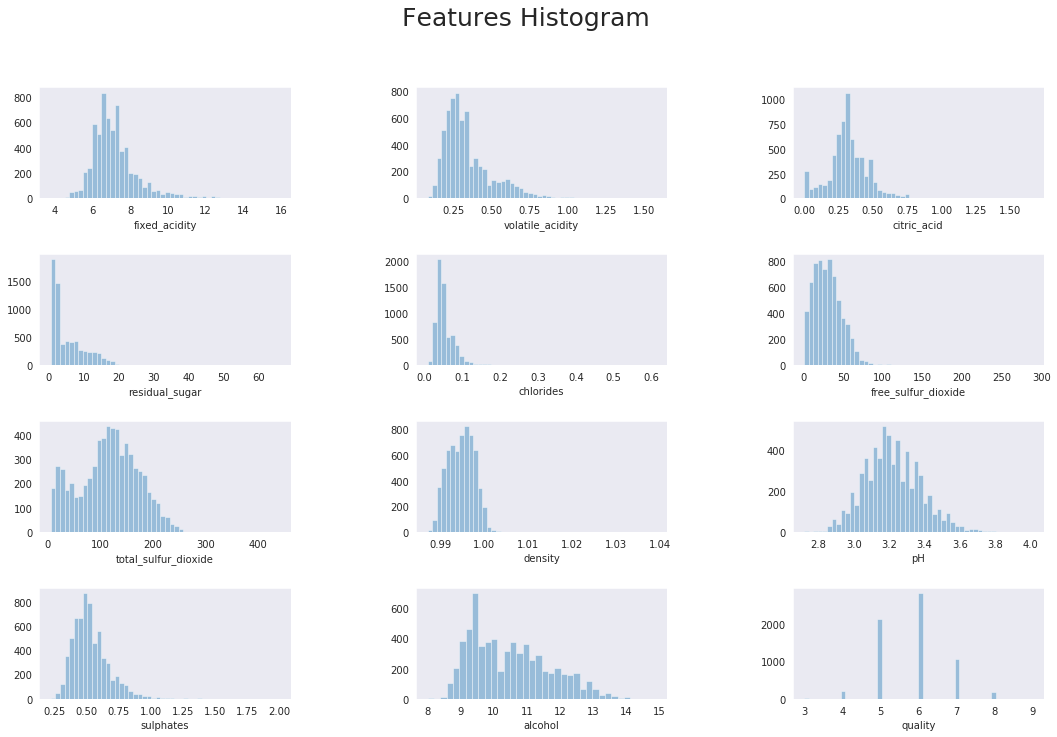

In [7]:
fig, axes = plt.subplots(4,3,figsize=(18,11.25))
plt.subplots_adjust(wspace=0.5,hspace=0.5)
fig.suptitle('Features Histogram',fontsize=25)

column_loc = 0

for i in range(4):
    for j in range(3):
        sns.distplot(a=df.iloc[:,column_loc],ax=axes[i,j],kde=False)
        column_loc += 1

Any model created with this data will be biased to give the quality near six. Also, the features range vary a lot, some scaling will be needed.

3. Bivariate analysis


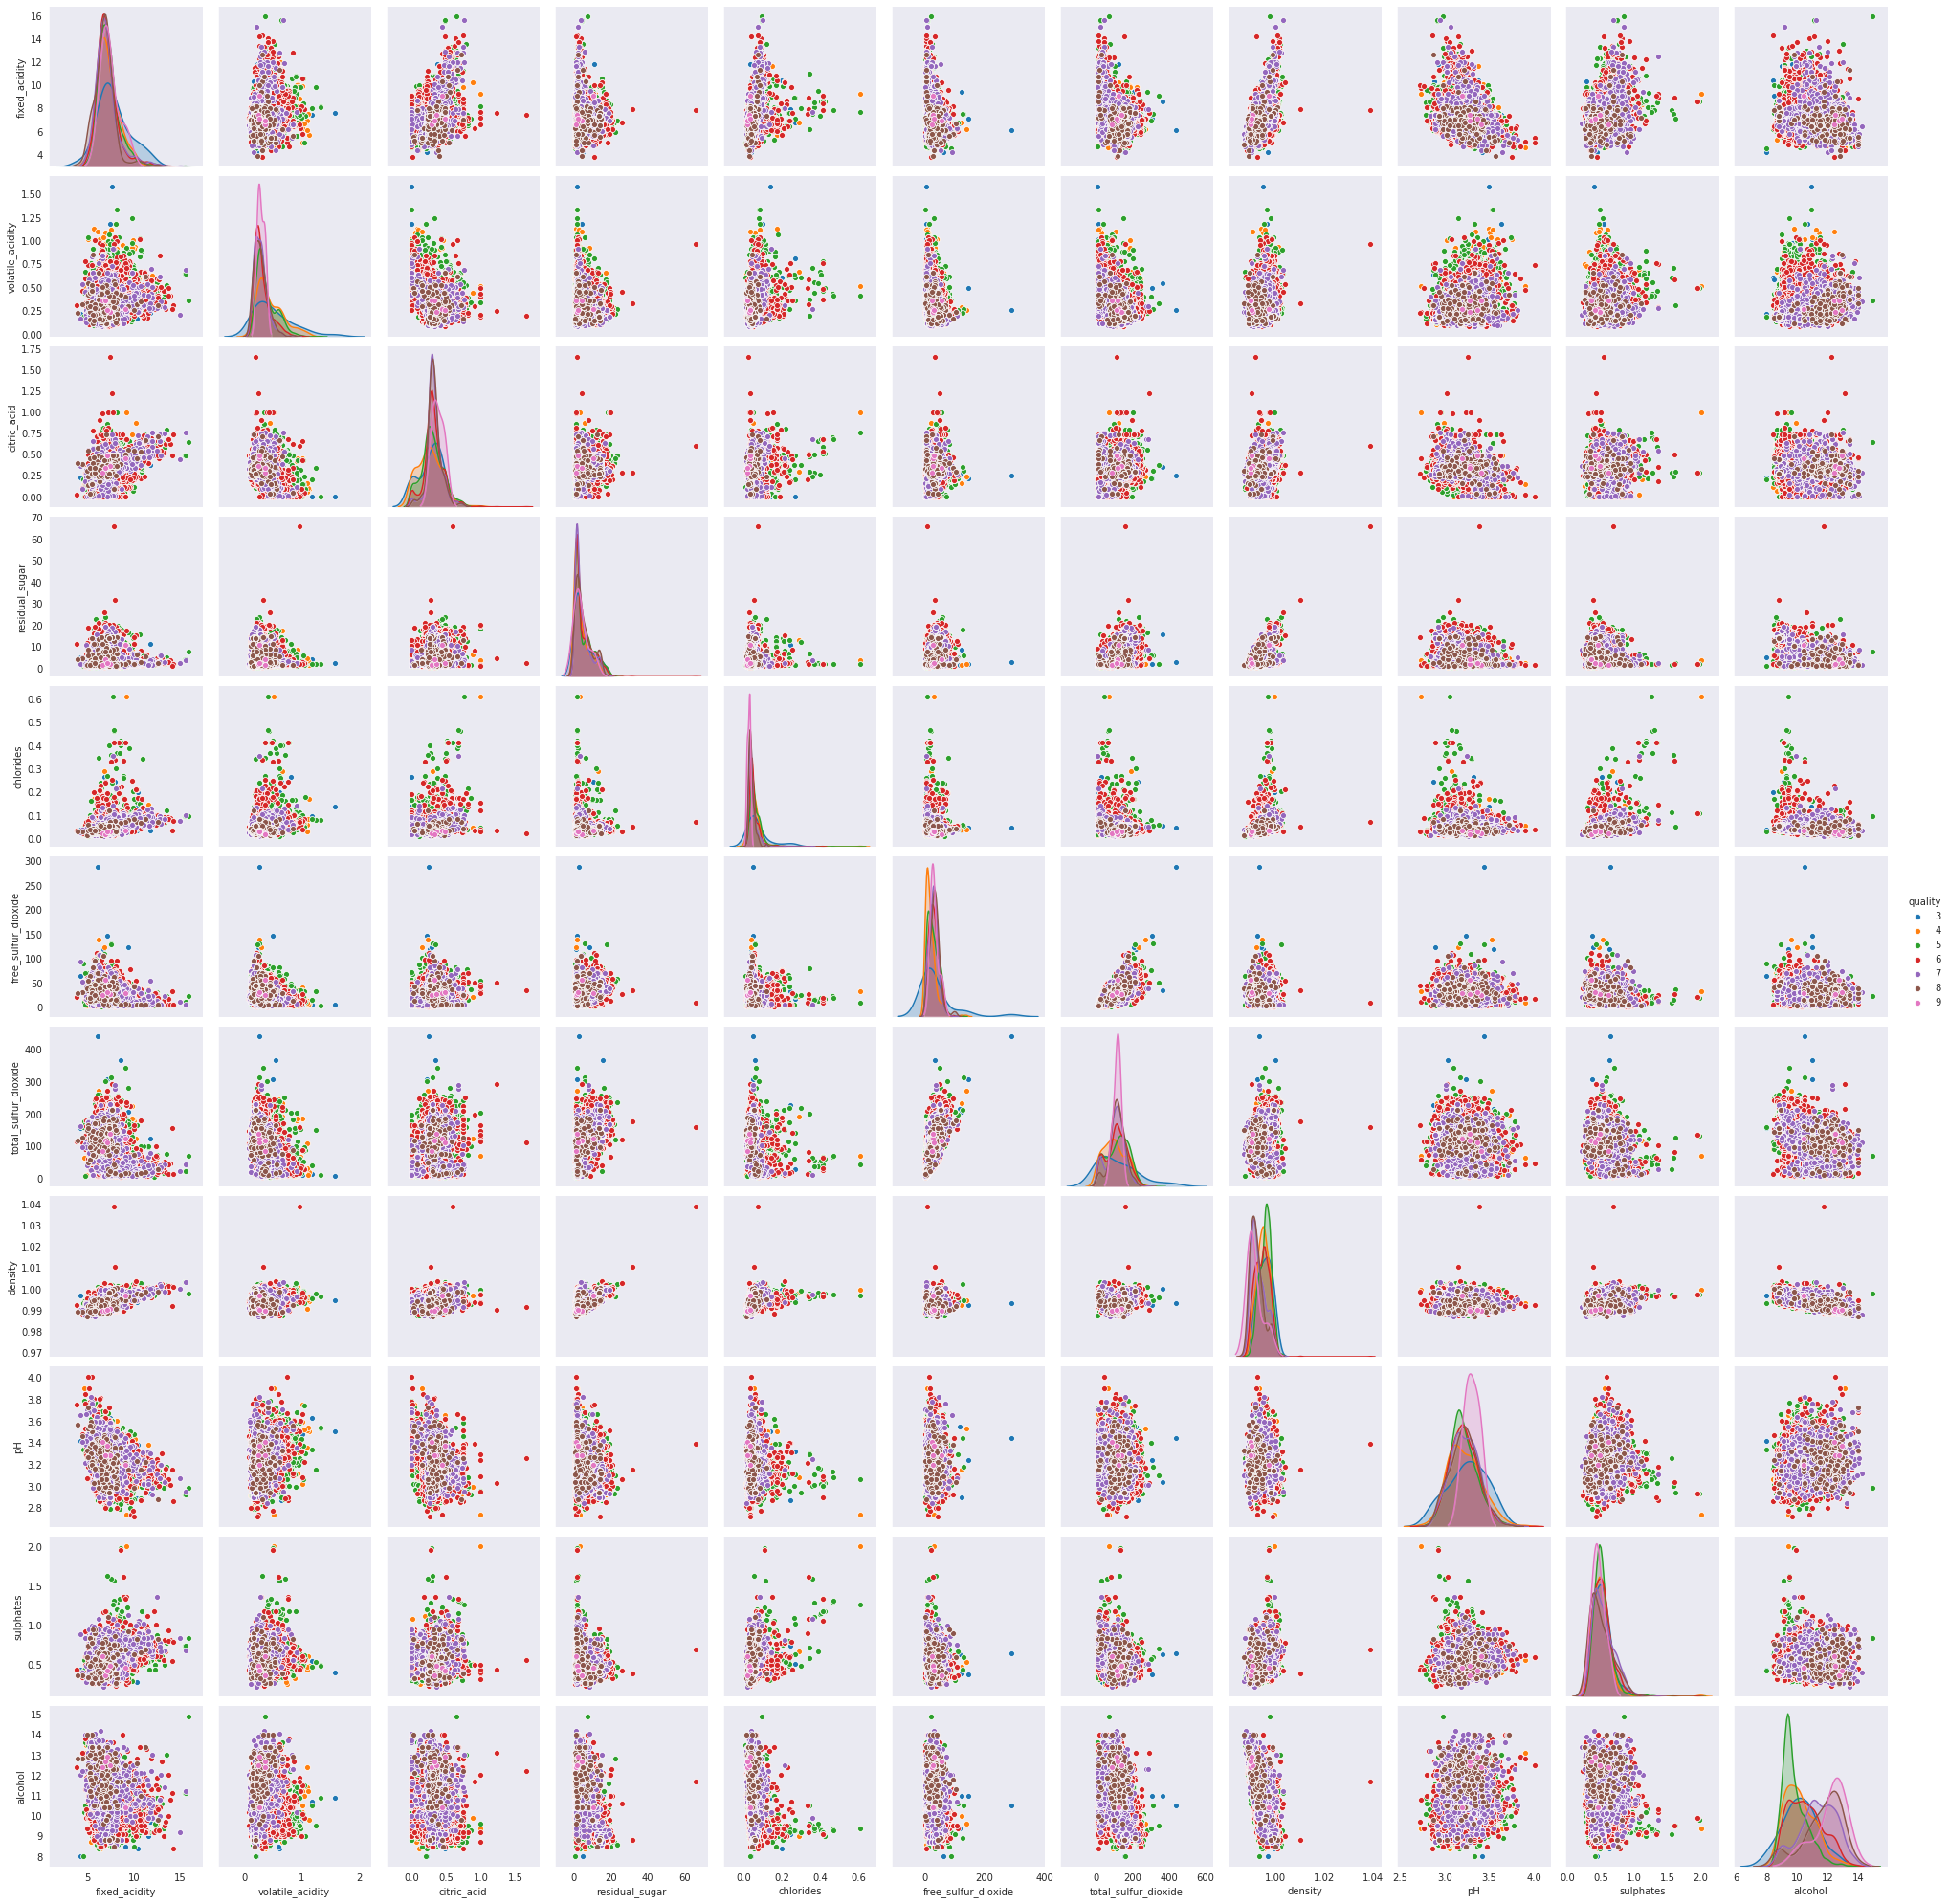

In [8]:
sns.pairplot(df,hue='quality');

Too much data to analyse just by looking at it. Let's use another kind of analysis.

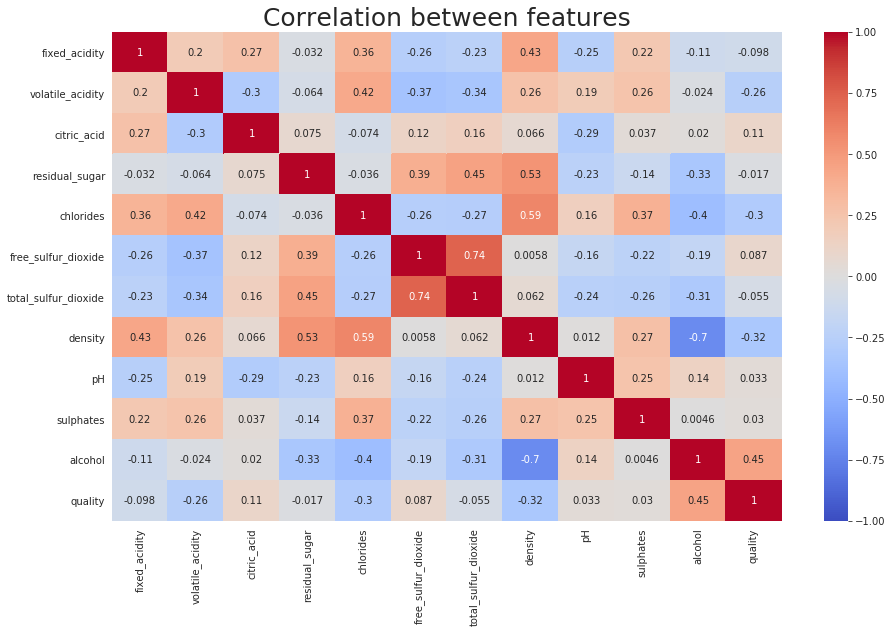

In [9]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(method='spearman'),vmin=-1,vmax=1,cmap='coolwarm',annot=True)
plt.title('Correlation between features',fontsize=25)
plt.show()

There is not relevant correlation between our dependent and independent variables.

## Data Preparation

___

4. Missing values treatment

In [10]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values to be treated

5. Outlier treatment

Since the task at hand is a classification we will leave outlier for now since regression tasks are the most affected by them and not classification.

## Feature Engineering

___

6. Feature creation (+ target creation)

In [11]:
## script

df['rest_of_sulfur'] = df.total_sulfur_dioxide - df.free_sulfur_dioxide
df['volatile_acid_types'] = pd.qcut(df.volatile_acidity,q=4,labels=['lowest','low','high','highest'])
df['target'] = pd.qcut(df.quality,q=3,labels=['bad','medium','good'])

In [12]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,rest_of_sulfur,volatile_acid_types,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,23.0,highest,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,42.0,highest,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,39.0,highest,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,43.0,low,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,23.0,highest,bad


In [13]:
df[df.target == 'bad'].quality.unique(), df[df.target == 'bad'].shape[0]

(array([5, 4, 3]), 2384)

In [14]:
df[df.target == 'medium'].quality.unique(), df[df.target == 'bad'].shape[0]

(array([6]), 2384)

In [15]:
df[df.target == 'good'].quality.unique(), df[df.target == 'bad'].shape[0]

(array([7, 8, 9]), 2384)

In [16]:
## script

df.drop('quality',axis=1,inplace=True)

New features created and to balance the dataset I binned the 'quality' target to create a 3 equal-sized categorical feature.

7. Feature transformation

In [17]:
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(np.array([df.volatile_acid_types.values]).reshape(-1,1))
ohe.get_feature_names()

array(['x0_high', 'x0_highest', 'x0_low', 'x0_lowest'], dtype=object)

In [18]:
## script

X = df.drop('target',axis=1)
y = df.target
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,rest_of_sulfur,volatile_acid_types
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,23.0,highest
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,42.0,highest
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,39.0,highest
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,43.0,low
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,23.0,highest
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,68.0,lowest
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,111.0,high
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,81.0,low
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,90.0,low


In [19]:
## script

ct = ColumnTransformer([('ohe',OneHotEncoder(sparse=False),['volatile_acid_types']),
                        ('quantile',QuantileTransformer(output_distribution='normal'),slice(0,12))],remainder='passthrough')
X = ct.fit_transform(X)

In [20]:
## script

final_dataframe = pd.DataFrame(X,columns=['volatile_acid_types_high', 'volatile_acid_types_highest', 'volatile_acid_types_low', 'volatile_acid_types_lowest',
                       'fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide',
                        'density','pH','sulphates','alcohol','rest_of_sulfur'])
final_dataframe['target'] = y

In [21]:
final_dataframe

,volatile_acid_types_high,volatile_acid_types_highest,volatile_acid_types_low,volatile_acid_types_lowest,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,rest_of_sulfur,target
0,0.0,1.0,0.0,0.0,0.436240,1.773922,-5.199338,-0.593940,0.933910,-1.100140,-1.204935,0.983573,1.689670,0.396560,-0.819656,-1.109378,bad
1,0.0,1.0,0.0,0.0,0.731515,2.325972,-5.199338,-0.114415,1.593219,-0.207223,-0.791884,0.613509,-0.041413,1.111702,-0.360172,-0.833781,bad
2,0.0,1.0,0.0,0.0,0.731515,1.976943,-1.684464,-0.265284,1.428482,-0.803958,-0.922330,0.680013,0.322932,0.963423,-0.360172,-0.862544,bad
3,0.0,0.0,1.0,0.0,2.074445,-0.110627,1.644369,-0.593940,0.903301,-0.667419,-0.864365,1.081940,-0.307111,0.529301,-0.360172,-0.821412,medium
4,0.0,1.0,0.0,0.0,0.436240,1.773922,-5.199338,-0.593940,0.933910,-1.100140,-1.204935,0.983573,1.689670,0.396560,-0.819656,-1.109378,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.0,0.0,0.0,1.0,-0.951518,-0.875354,-0.216204,-0.908975,-0.587964,-0.262686,-0.480839,-1.093272,0.378977,-0.062770,0.599937,-0.432104,medium
6493,1.0,0.0,0.0,0.0,-0.445919,0.213636,0.450080,0.658043,-0.016310,1.439001,0.897655,0.005018,-0.383024,-0.452858,-0.513491,0.565738,bad
6494,0.0,0.0,1.0,0.0,-0.573115,-0.529301,-1.077446,-1.517545,-0.469603,0.077862,-0.147316,-0.615025,-1.505747,-0.452858,-0.819656,-0.138444,medium
6495,0.0,0.0,1.0,0.0,-1.865852,-0.018820,-0.103057,-1.780005,-2.225823,-0.487893,-0.171458,-2.497511,0.773140,-1.189522,1.761948,0.074087,good
